In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("onlinefraud.csv")

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [26]:
counts = df['isFraud'].value_counts()
print(counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


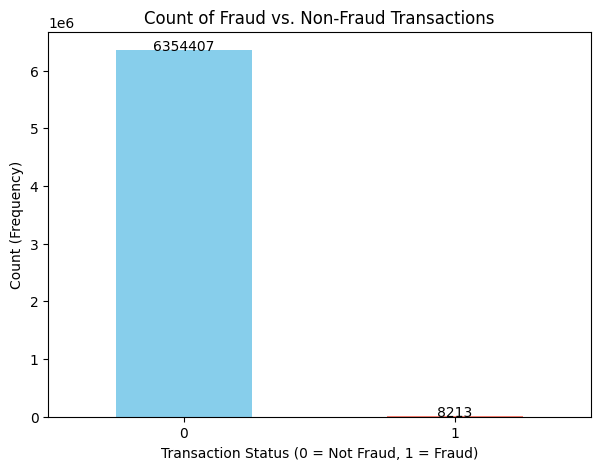

In [27]:
plt.figure(figsize=(7, 5))
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Transaction Status (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count (Frequency)')
plt.xticks(rotation=0)
for index, value in enumerate(counts):
    plt.text(index, value + 5, str(value), ha='center')

In [4]:
# Encode categorical features
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [5]:
# Split features and target
X = df.drop("isFraud", axis=1).values
y = df["isFraud"].values

In [6]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [7]:
cart = DecisionTreeClassifier(
    criterion="gini",   # CART uses Gini by default
    random_state=42
)

In [8]:
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9996552782763495


In [46]:
accuracy = 0.9997
remaining = 1.0 - accuracy
sizes = [accuracy, remaining]
labels = [f'Accuracy: {accuracy:.2%}', 'Error']
colors = ['skyblue', 'lightgray']
explode = [0, 0]

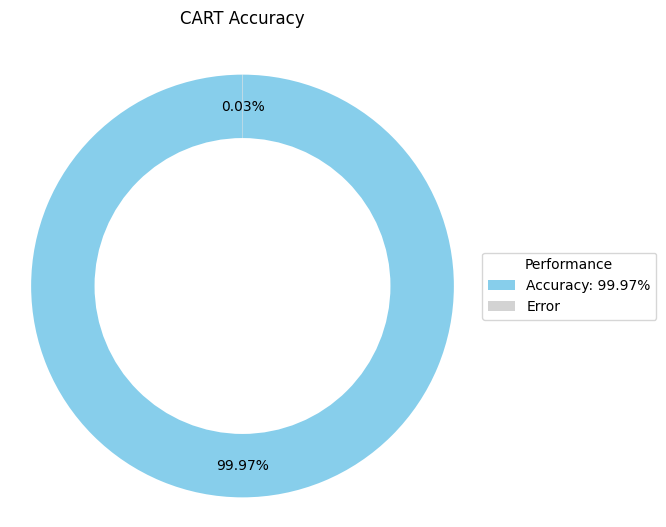

In [49]:
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.2f%%',  
    startangle=90,      
    colors=colors,
    explode=explode,
    pctdistance=0.85   
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('CART Accuracy', y=1.05)
plt.legend(wedges, labels, title="Performance", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

In [10]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.87      0.86      0.87      2464

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [41]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()
df_report = df_report.drop(columns=['support'])
df_plot = df_report.iloc[[0, 1]][['precision', 'recall', 'f1-score']]

<Axes: >

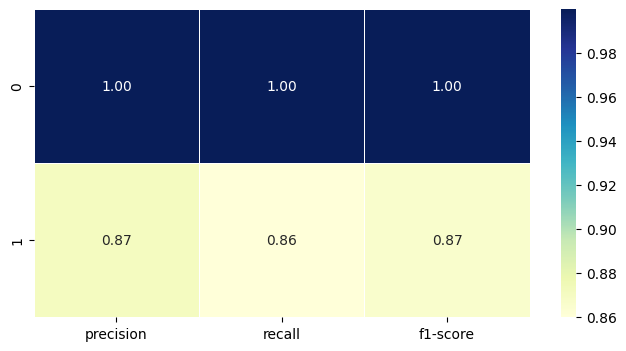

In [42]:
plt.figure(figsize=(8, 4))
sns.heatmap(
    df_plot,
    annot=True,            # Show the numeric value in each cell
    fmt=".2f",             # Format to 2 decimal places
    cmap="YlGnBu",         # Color map (Yellow-Green-Blue is often good)
    cbar=True,             # Display the color bar
    linewidths=.5,         # Add lines for separation
)

In [11]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1906009     313]
 [    345    2119]]


In [28]:
cm = confusion_matrix(y_test, y_pred)

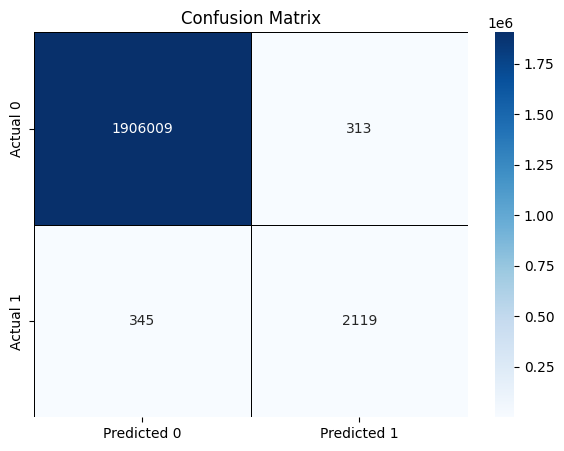

In [34]:
plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,              # Show the numbers inside the cells
    fmt="d",                 # Format the numbers as integers (d for decimal)
    cmap='Blues',            # Color map
    linewidths=.5,           # Add lines between cells
    linecolor='black',
    
    # Set labels for the axes
    xticklabels=['Predicted 0', 'Predicted 1'],
    yticklabels=['Actual 0', 'Actual 1']
)
plt.title('Confusion Matrix')
plt.show()